# Case Study 2: Bellabeat - How Can A Wellness Technology Company Play It Smart?

This is a case study performed as a Junior Data Analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women.

This case study will focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are already using their smart devices hence helping to guide marketing strategy for the company. The public dataset that used is the [Fitbit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit) by Möbius.

# Business Task

The aim of this case study is to find out how people are already using smart device and how we could improve the marketing of Bellabeat's product - specifically *Bellabeat app*.

### Stakeholders

Primary stakeholder - Bellabeat’s cofounder and Chief Creative Officer and the executive team  
  
  
Secondary stakeholder - Bellabeat's marketing analytics team

# Data Preparation

As mentioned in this public data set, these datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016 - 05.12.2016 (***from the datasets, it is from 04.12.2016 to 05.12.2016***). Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors/ preferences.

The Möbius' dataset on Kaggle consisted of 18 csv files which could be categorised under the following main features:

1. activity level/ intensities
2. number steps
3. calories burn
3. sleep log
4. heart rate log
5. weight log
6. METs value (Metabolic Equivalents)

Also, there are a number of datasets which are stored as different measurement unit or different table format (long and wide table). Before proceding to process the data, a quick check for the data criteria:

- (R)eliable - the data does not specifiy the gender, age group or the lifestyle of the participants which could possibly lead to bias
- (O)riginal - yes, the data is original
- (C)omprehensive - the data included basic smart device features
- (C)urrent - a more updated data would be ideal since the data was collected in the year 2016
- (C)ited - yes, the data is cited

In [37]:
#install packages
install.packages("tidyverse")
install.packages("lubridate")
install.packages("skimr")
install.packages("janitor")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘tidyverse’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘lubridate’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Inst

In [39]:
#load packages
library(tidyverse)
library(lubridate)
library(janitor)
library(dplyr)
library(ggplot2)

We are first interested in looking into these datasets containing the smart device main features:

1. activity levels/ intensities - dailyActivity_merged.csv
2. sleeping patterns - sleepDay_merged.csv
3. heart rate logged - heartrate_seconds_merged.csv
4. weight logged - weightLogInfo_merged.csv
5. metabolic equivalents recorded - minuteMETsNarrow_merged.csv (*the only dataset on METs*)

In [40]:
#loading the first five datasets
daily_activity_raw <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_sleep_raw <-read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
heartrate_s_raw <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
weight_log_raw <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
mets_mins_raw <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")

In [41]:
#inspecting the first five dataset
glimpse(daily_activity_raw)
summary(daily_activity_raw)

glimpse(daily_sleep_raw)
summary(daily_sleep_raw)

glimpse(heartrate_s_raw)
summary(heartrate_s_raw)

glimpse(weight_log_raw)
summary(weight_log_raw)

glimpse(mets_mins_raw)
summary(mets_mins_raw)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

       Id            ActivityDate         TotalSteps    TotalDistance   
 Min.   :1.504e+09   Length:940         Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Mode  :character   Median : 7406   Median : 5.245  
 Mean   :4.855e+09                      Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09                      3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09                      Max.   :36019   Max.   :28.030  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :4.9421           Max.   :21.920    
 ModeratelyActiveDistance LightActiveDistance Sedentary

Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", "…
$ TotalSleepRecords  <int> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…


       Id              SleepDay         TotalSleepRecords TotalMinutesAsleep
 Min.   :1.504e+09   Length:413         Min.   :1.000     Min.   : 58.0     
 1st Qu.:3.977e+09   Class :character   1st Qu.:1.000     1st Qu.:361.0     
 Median :4.703e+09   Mode  :character   Median :1.000     Median :433.0     
 Mean   :5.001e+09                      Mean   :1.119     Mean   :419.5     
 3rd Qu.:6.962e+09                      3rd Qu.:1.000     3rd Qu.:490.0     
 Max.   :8.792e+09                      Max.   :3.000     Max.   :796.0     
 TotalTimeInBed 
 Min.   : 61.0  
 1st Qu.:403.0  
 Median :463.0  
 Mean   :458.6  
 3rd Qu.:526.0  
 Max.   :961.0  

Rows: 2,483,658
Columns: 3
$ Id    <dbl> 2022484408, 2022484408, 2022484408, 2022484408, 2022484408, 2022…
$ Time  <chr> "4/12/2016 7:21:00 AM", "4/12/2016 7:21:05 AM", "4/12/2016 7:21:…
$ Value <int> 97, 102, 105, 103, 101, 95, 91, 93, 94, 93, 92, 89, 83, 61, 60, …


       Id                Time               Value       
 Min.   :2.022e+09   Length:2483658     Min.   : 36.00  
 1st Qu.:4.388e+09   Class :character   1st Qu.: 63.00  
 Median :5.554e+09   Mode  :character   Median : 73.00  
 Mean   :5.514e+09                      Mean   : 77.33  
 3rd Qu.:6.962e+09                      3rd Qu.: 88.00  
 Max.   :8.878e+09                      Max.   :203.00  

Rows: 67
Columns: 8
$ Id             <dbl> 1503960366, 1503960366, 1927972279, 2873212765, 2873212…
$ Date           <chr> "5/2/2016 11:59:59 PM", "5/3/2016 11:59:59 PM", "4/13/2…
$ WeightKg       <dbl> 52.6, 52.6, 133.5, 56.7, 57.3, 72.4, 72.3, 69.7, 70.3, …
$ WeightPounds   <dbl> 115.9631, 115.9631, 294.3171, 125.0021, 126.3249, 159.6…
$ Fat            <int> 22, NA, NA, NA, NA, 25, NA, NA, NA, NA, NA, NA, NA, NA,…
$ BMI            <dbl> 22.65, 22.65, 47.54, 21.45, 21.69, 27.45, 27.38, 27.25,…
$ IsManualReport <chr> "True", "True", "False", "True", "True", "True", "True"…
$ LogId          <dbl> 1.462234e+12, 1.462320e+12, 1.460510e+12, 1.461283e+12,…


       Id                Date              WeightKg       WeightPounds  
 Min.   :1.504e+09   Length:67          Min.   : 52.60   Min.   :116.0  
 1st Qu.:6.962e+09   Class :character   1st Qu.: 61.40   1st Qu.:135.4  
 Median :6.962e+09   Mode  :character   Median : 62.50   Median :137.8  
 Mean   :7.009e+09                      Mean   : 72.04   Mean   :158.8  
 3rd Qu.:8.878e+09                      3rd Qu.: 85.05   3rd Qu.:187.5  
 Max.   :8.878e+09                      Max.   :133.50   Max.   :294.3  
                                                                        
      Fat             BMI        IsManualReport         LogId          
 Min.   :22.00   Min.   :21.45   Length:67          Min.   :1.460e+12  
 1st Qu.:22.75   1st Qu.:23.96   Class :character   1st Qu.:1.461e+12  
 Median :23.50   Median :24.39   Mode  :character   Median :1.462e+12  
 Mean   :23.50   Mean   :25.19                      Mean   :1.462e+12  
 3rd Qu.:24.25   3rd Qu.:25.56                      3rd 

Rows: 1,325,580
Columns: 3
$ Id             <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960…
$ ActivityMinute <chr> "4/12/2016 12:00:00 AM", "4/12/2016 12:01:00 AM", "4/12…
$ METs           <int> 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 10, 10,…


       Id            ActivityMinute          METs       
 Min.   :1.504e+09   Length:1325580     Min.   :  0.00  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 10.00  
 Median :4.445e+09   Mode  :character   Median : 10.00  
 Mean   :4.848e+09                      Mean   : 14.69  
 3rd Qu.:6.962e+09                      3rd Qu.: 11.00  
 Max.   :8.878e+09                      Max.   :157.00  

From both the `glimpse()` and `summary()` function, the dimension of these data sets are different, i.e the number of records are different, which led us thinking: ***do all individuals record everything? If not, what features do they mainly use?*** Other than that, we could also see that the "daily_activity_raw" is a merged data frame containing data of daily steps and calories count, which would be a good start off point for us. But before that, we will find out how exactly were the smart device used.

# Data Processing

First, we'll clean each of these datasets before further processing them.

## 1. daily activity data

In [42]:
#checking for any duplicated rows and missing value -- result in none
daily_activity_raw[duplicated(daily_activity_raw),]
colSums(is.na(daily_activity_raw))

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>


Id             ActivityDate               TotalSteps 
                       0                        0                        0 
           TotalDistance          TrackerDistance LoggedActivitiesDistance 
                       0                        0                        0 
      VeryActiveDistance ModeratelyActiveDistance      LightActiveDistance 
                       0                        0                        0 
 SedentaryActiveDistance        VeryActiveMinutes      FairlyActiveMinutes 
                       0                        0                        0 
    LightlyActiveMinutes         SedentaryMinutes                 Calories 
                       0                        0                        0

In [43]:
daily_activity <- daily_activity_raw %>%
  clean_names() %>%
  dplyr::rename(moderately_active_minutes = fairly_active_minutes)%>%
  dplyr::rename(date = activity_date) %>% 
  mutate(date = mdy(date))

## 2. daily sleep data

In [44]:
#checking for any duplicated rows and missing value -- result in 3 rows
daily_sleep_raw[duplicated(daily_sleep_raw),]
colSums(is.na(daily_sleep_raw))

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
162,4388161847,5/5/2016 12:00:00 AM,1,471,495
224,4702921684,5/7/2016 12:00:00 AM,1,520,543
381,8378563200,4/25/2016 12:00:00 AM,1,388,402


Id           SleepDay  TotalSleepRecords TotalMinutesAsleep 
                 0                  0                  0                  0 
    TotalTimeInBed 
                 0

In [45]:
#remove duplicated data
daily_sleep <- daily_sleep_raw[!duplicated(daily_sleep_raw),]

In [46]:
#clean and organizing the data
daily_sleep <- daily_sleep %>%
  clean_names() %>%
  separate(sleep_day, into = c("date","time"), sep = " ") %>% 
  mutate(date = mdy(date)) %>%
  #time is removed as it is irrelevant
  select(-time)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 410 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


## 3. heart rate per second data

In [48]:
#checking for any duplicated rows and missing value -- result in none
heartrate_s_raw[duplicated(heartrate_s_raw),]
colSums(is.na(heartrate_s_raw))

Id,Time,Value
<dbl>,<chr>,<int>


Id  Time Value 
    0     0     0

In [49]:
#cleaning and organizing the data
heartrate_s <- heartrate_s_raw %>%
  clean_names() %>%
  dplyr::rename(date_time = time) %>% 
  mutate(date_time = mdy_hms(date_time))

## 4. weight log data

From the function `glimpse()`performed earlier, we find out that there are quite a number of missing values in weight log data, particularly in the column "fat". There are only 2 records, hence we will remove them as they are considered irrelevant.

In [50]:
#checking for any duplicated rows -- result in none
weight_log_raw[duplicated(weight_log_raw),]
colSums(is.na(weight_log_raw))

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>


Id           Date       WeightKg   WeightPounds            Fat 
             0              0              0              0             65 
           BMI IsManualReport          LogId 
             0              0              0

In [51]:
#cleaning and organizing the data
weight_log <- weight_log_raw %>%
  clean_names() %>%
  separate(date, into = c("date","time"), sep=" ") %>% 
  mutate(date = mdy(date)) %>% 
  #time of record, fat and log id are removed as it is irrelevant
  select(c(1,2,4,5,7,8))

Warning message:
“Expected 2 pieces. Additional pieces discarded in 67 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


## 5. METs per minute data

In [52]:
#checking for any duplicated rows -- result in none
mets_mins_raw[duplicated(mets_mins_raw),]
colSums(is.na(mets_mins_raw))

Id,ActivityMinute,METs
<dbl>,<chr>,<int>


Id ActivityMinute           METs 
             0              0              0

In [53]:
#cleaning and organizing the dat
mets_mins <- mets_mins_raw %>%
  clean_names() %>% 
  dplyr::rename(date_time = activity_minute) %>% 
  dplyr::rename(mets_value = me_ts) %>% 
  mutate(date_time = mdy_hms(date_time))

# Data Analyzing

## How are people using the smart device? What feature do people use the most and least?
Here we will figure out how many distinct id(s) are recorded in each datasets, which indirectly reflects on how many individuals were using each features.

In [54]:
#figure out distinct id
n_distinct(daily_activity$id)
n_distinct(daily_sleep$id)
n_distinct(heartrate_s$id)
n_distinct(weight_log$id)
n_distinct(mets_mins$id)

[1] 33

[1] 24

[1] 14

[1] 8

[1] 33

## Who tracks what?
By now, we can tell that the smart device's default features inclusive of: active minutes/ levels, distance traveled, number of steps and calories burned. There are a total of **33 records** indicating the total number of individuals these data collected from, and not all of them were active users of these existing features. *Let's look into this!*

In [55]:
#install and load Venn diagram package
install.packages("VennDiagram")
library(VennDiagram)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘VennDiagram’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Loading required package: grid

Loading required package: futile.logger



In [56]:
#create lists of unique id for each features
sleep_unique_id <- unique(daily_sleep$id)
heartrate_unique_id <-unique(heartrate_s$id)
weightlog_unique_id <- unique(weight_log$id)

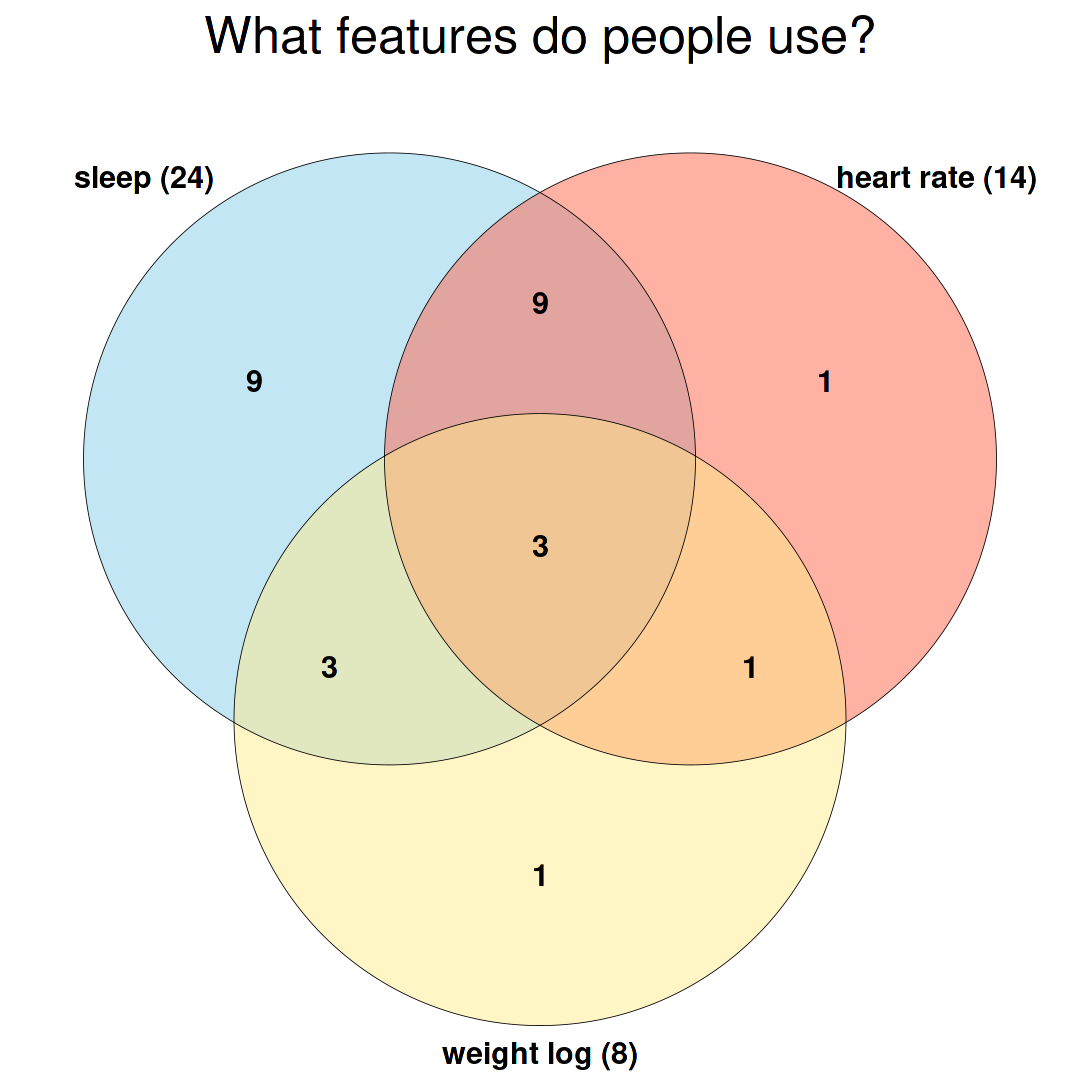

In [57]:
#combine the lists of unique id to create Venn diagram
options(repr.plot.width = 9, repr.plot.height = 9)
x <- list(sleep_unique_id, heartrate_unique_id, weightlog_unique_id)
venn <- venn.diagram(x,
             category.names = c("sleep (24)", "heart rate (14)", "weight log (8)"),
             filename = NULL,
             main="What features do people use?", main.fontfamily = "sans",
             main.cex = 2.5, margin=0.05,
             lwd = 0.5, fill = c("skyblue", "tomato", "lightgoldenrod1"),
             cex = 1.5, fontface = "bold", fontfamily = "sans", 
             cat.cex = 1.5, cat.fontface = "bold", cat.fontfamily = "sans",
             cat.default.pos= "outer")
grid.newpage()
grid.draw(venn)

### **Findings:**
- **3 out of 33 people** who utilized **all the main features** of the smart device
- only **1** who **did not use any** of these features other than the smart device's default features
- about half, **16 out of 33**, of the people monitored **both their sleep and heart rate**

Next question is: ***how often do they use these features within the month (i.e. the period of time these data were collected)***?

In [63]:
#for daily activity merged
activity_n_days <- daily_activity %>% 
  dplyr::group_by(id) %>% 
  dplyr::summarise(n_active=n_distinct(`date`)) ##see if this work
#for daily sleep
sleep_days <- daily_sleep %>% 
  dplyr::group_by(id) %>% 
  dplyr::summarise(n_sleep=n_distinct(`date`))
#for heart rate record
heartrate_days <- heartrate_s %>% 
  dplyr::group_by(id) %>% 
  dplyr::summarise(n_heartrate=n_distinct(date(date_time)))
##for weight log
weight_log_days <- weight_log %>% 
  dplyr::group_by(id) %>% 
  dplyr::summarise(n_weight=n_distinct(`date`))

In [66]:
#perform left join to get total number of days for each feature
recorded_days <- activity_n_days %>% 
  left_join(sleep_days, by=c("id"="id")) %>% 
              left_join(heartrate_days, by=c("id"="id")) %>%
  left_join(weight_log_days, by=c("id"="id"))
#inspecting the dataframe created
head(recorded_days)

id,n_active,n_sleep,n_heartrate,n_weight
<dbl>,<int>,<int>,<int>,<int>
1503960366,31,25,NA,2
1624580081,31,NA,NA,NA
1644430081,30,4,NA,NA
1844505072,31,3,NA,NA
1927972279,31,5,NA,1
2022484408,31,NA,31,NA


In [67]:
#transform data from wide to long to produce bar chart
recorded_days$id <- factor(recorded_days$id)
data_long <- recorded_days %>% 
  gather(type_of_record, `days`, n_active:n_weight, factor_key = TRUE) %>% 
  arrange(id)

In [68]:
#install packages for stacked bar chart
install.packages("ggpubr")
install.packages("ggsci")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘ggpubr’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘ggsci’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [69]:
#load packages
library(ggpubr)
library(ggsci)


Attaching package: ‘ggpubr’


The following object is masked from ‘package:VennDiagram’:

    rotate


The following object is masked from ‘package:plyr’:

    mutate




Warning message:
“Removed 53 rows containing missing values (position_stack).”
Warning message:
“Removed 53 rows containing missing values (position_stack).”


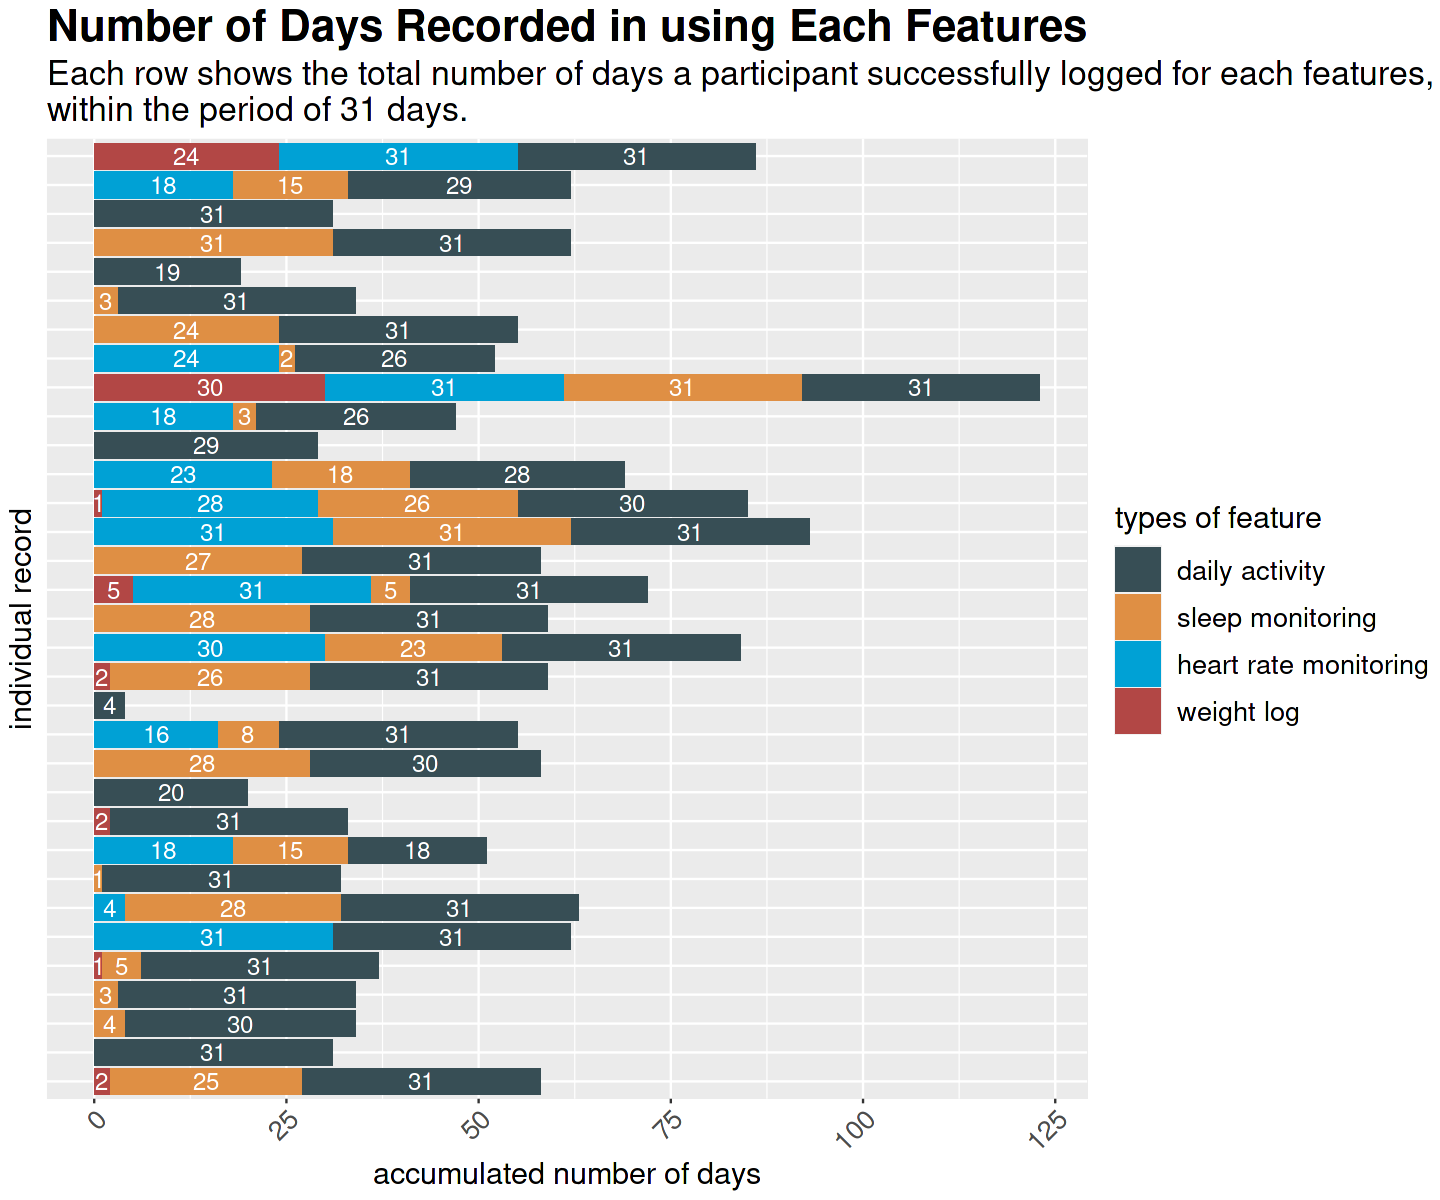

In [70]:
#days vs. features - stacked bar chart
options(repr.plot.width = 12, repr.plot.height = 10)
ggplot(data_long, mapping=aes(fill=type_of_record, x=id, y=days)) +
geom_bar(stat="identity") +
  geom_text(aes(label=days), position = position_stack(vjust= 0.5),
            colour = "white", size = 5) + coord_flip() +
  labs(title="Number of Days Recorded in using Each Features",
         x="individual record", y="accumulated number of days",
       subtitle="Each row shows the total number of days a participant successfully logged for each features,
within the period of 31 days.") +
  theme_gray()+
  theme(plot.title = element_text(size=26,face="bold"),
        plot.subtitle=element_text(size=20),
        legend.key.size = unit(1, 'cm'),
        legend.key.height = unit(1, 'cm'),
        legend.key.width = unit(1, 'cm'),
        legend.title = element_text(size=18),
        legend.text = element_text(size=16),
        axis.title=element_text(size=18),
        axis.text=element_text(size=16),
        axis.text.x = element_text(angle = 45, hjust=1),
        axis.text.y= element_blank(),
        axis.ticks.y= element_blank()) +
  scale_fill_jama(name = "types of feature",
                  labels = c("daily activity", "sleep monitoring",
                             "heart rate monitoring", "weight log"))

In [71]:
nrow(recorded_days %>% filter(n_active <= 21))

[1] 4

Looking from the graph, almost **90% of the participants** had put on their smart devices throughout the period of 31 days, if not, at least **more than 21 days**, as there was only 4 people has recorded otherwise. There was also a huge difference in the days of usage for the weight log feature which we will look into further below.

## Number of Days Recorded for Each Feature
Let's find out for each of these features, ***how frequent were they recorded within a month***?  
  
Based on the total number of days these features were used, we are categorizing them into three groups, usage for:

- less than 10 days
- between 11-20 days
- more than 21 days

In [72]:
#creating the groups
days_of_usage <- c("less than 10 days", "between 11-20 days","more than 21 days")

Here we are producing **pie charts** showing the number of days recorded for the usage of each feature:  
  
### **1. Sleep Monitoring feature**

In [96]:
sleep_day_count <- c(
  n_distinct(sleep_days %>% filter(n_sleep <=10)),
  n_distinct(sleep_days %>% filter(n_sleep >=11, n_sleep<=20)),
  n_distinct(sleep_days %>% filter(n_sleep >=21))
  )
#creating the data frame for pie chart - sleep monitoring
sleep_day_perc <- data.frame(days_of_usage, sleep_day_count)
sleep_day_perc <- sleep_day_perc %>% 
  mutate(perc=round(sleep_day_count/ sum(sleep_day_count) * 100,1))
View(sleep_day_perc)

days_of_usage,sleep_day_count,perc
<chr>,<int>,<dbl>
less than 10 days,9,37.5
between 11-20 days,3,12.5
more than 21 days,12,50.0


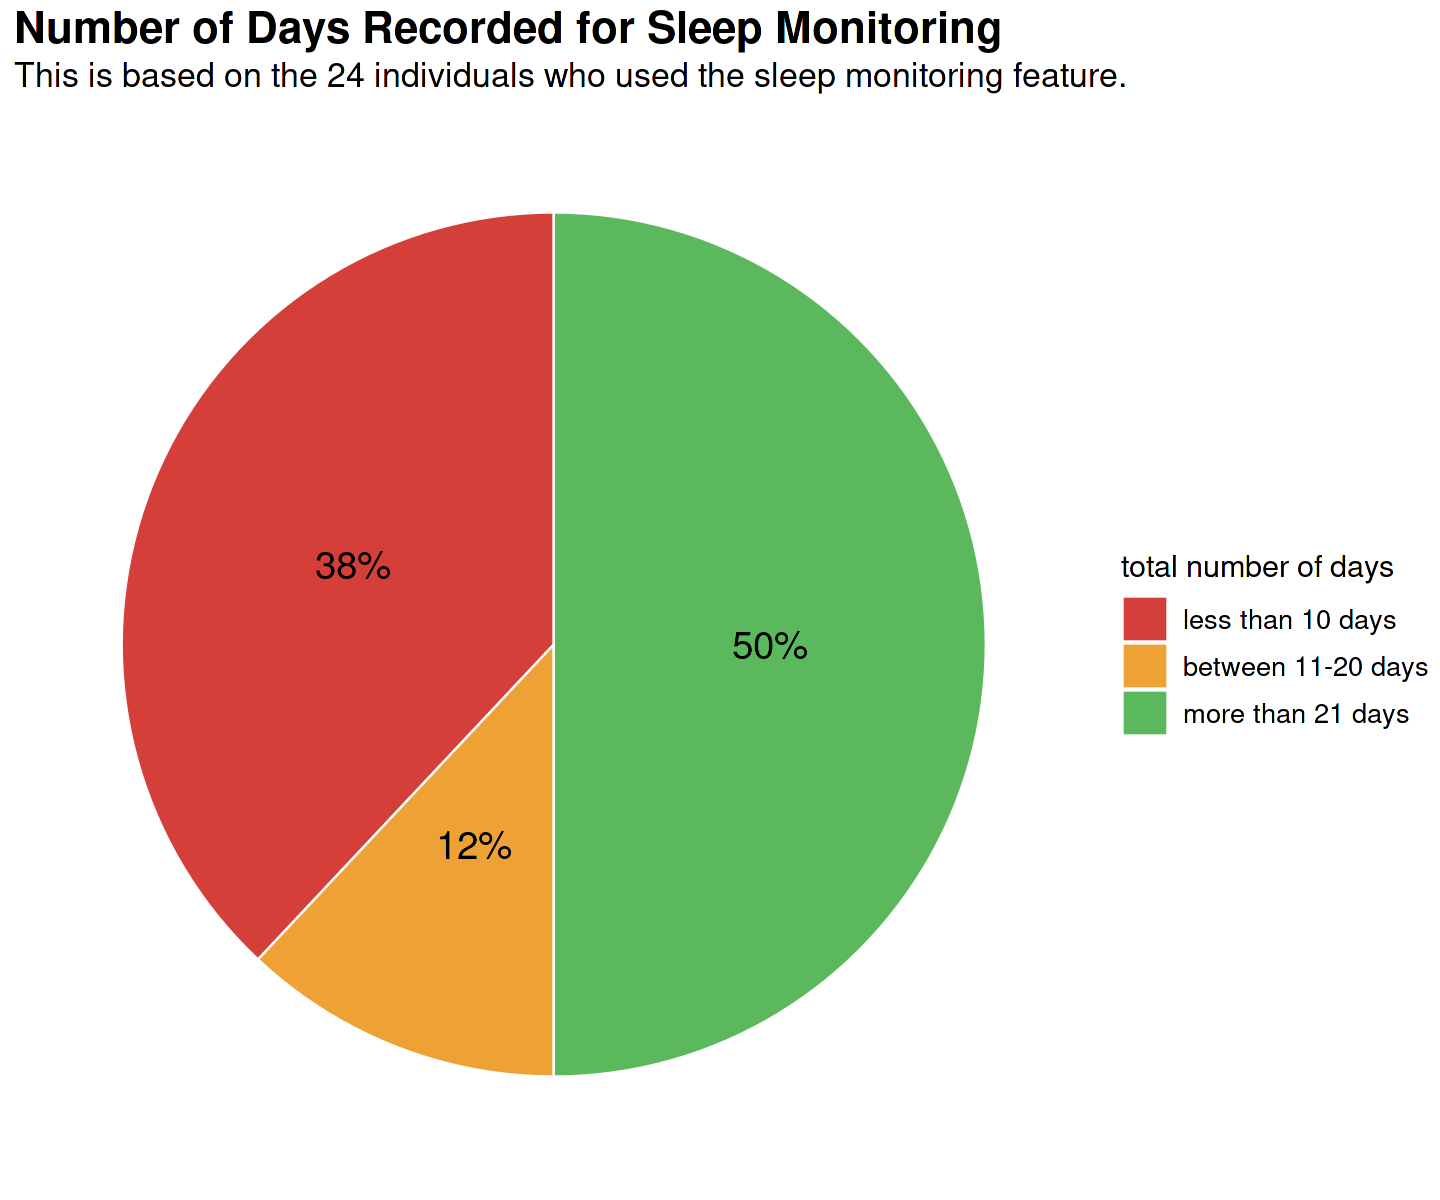

In [74]:
#to avoid r arranges visual and legend in ascending order
sleep_day_perc$days_of_usage <- 
factor(sleep_day_perc$days_of_usage, levels = c("less than 10 days", "between 11-20 days", "more than 21 days"))

#plotting pie chart
p <- sleep_day_perc %>% 
  ggplot() + theme_bw() +
  geom_bar(aes(x=" ", y=perc, fill=days_of_usage),stat="identity", colour="white")+
  coord_polar("y", start =0) +
  labs(title="Number of Days Recorded for Sleep Monitoring",
       subtitle="This is based on the 24 individuals who used the sleep monitoring feature.") +
  theme(plot.title = element_text(size=26,face="bold"),
        plot.subtitle=element_text(size=20),
        legend.key.size = unit(1, 'cm'),
        legend.key.height = unit(1, 'cm'),
        legend.key.width = unit(1, 'cm'),
        legend.title = element_text(size=18),
        legend.text = element_text(size=16),
        axis.title = element_blank(),
        axis.text = element_blank(), axis.ticks = element_blank(),
        panel.grid = element_blank(), panel.border = element_blank()) +
  scale_fill_locuszoom(name = "total number of days") +
  geom_text(aes(x=" ", y= ypos, label= paste0(perc, "%")), size=8)


ypos <- cumsum(sleep_day_perc$perc) - 0.5*(sleep_day_perc$perc)
ypos <- 100-ypos

print(p)

### **2. Heart Rate Monitoring feature**

In [75]:
heartrate_day_count <- c(
  n_distinct(heartrate_days %>% filter(n_heartrate <=10)),
  n_distinct(heartrate_days %>% filter(n_heartrate >=11, n_heartrate<=20)),
  n_distinct(heartrate_days %>% filter(n_heartrate >=21))
)
print(heartrate_day_count)

heartrate_day_perc <- data.frame(days_of_usage, heartrate_day_count)
heartrate_day_perc <- heartrate_day_perc %>% 
  mutate(perc=round(heartrate_day_count/ sum(heartrate_day_count) * 100,1))
View(heartrate_day_perc)

[1] 1 4 9


days_of_usage,heartrate_day_count,perc
<chr>,<int>,<dbl>
less than 10 days,1,7.1
between 11-20 days,4,28.6
more than 21 days,9,64.3


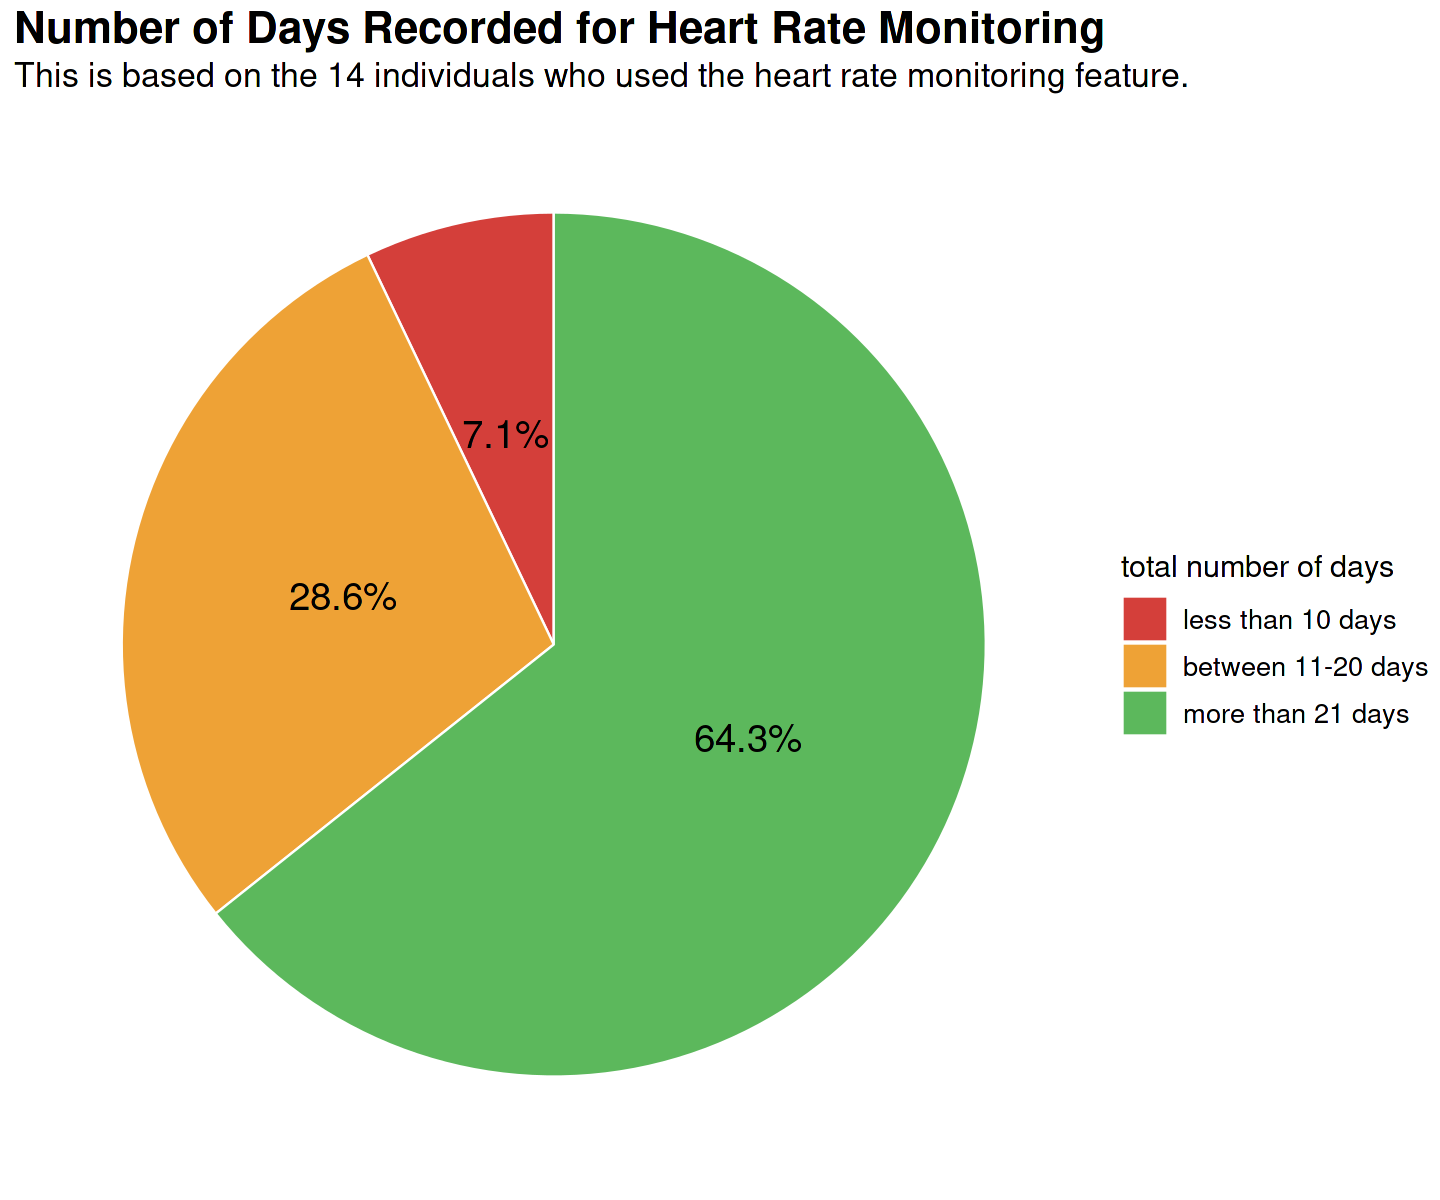

In [76]:
#to avoid r arranges visual and legend in ascending order
heartrate_day_perc$days_of_usage <- 
factor(heartrate_day_perc$days_of_usage, levels = c("less than 10 days", "between 11-20 days", "more than 21 days"))

#plotting pie chart
q <- heartrate_day_perc %>% 
  ggplot() + theme_bw() +
  geom_bar(aes(x=" ", y=perc, fill=days_of_usage),stat="identity", colour="white")+
  coord_polar("y", start =0) +
  labs(title="Number of Days Recorded for Heart Rate Monitoring",
       subtitle="This is based on the 14 individuals who used the heart rate monitoring feature.") +
  theme(plot.title = element_text(size=26,face="bold"),
        plot.subtitle=element_text(size=20),
        legend.key.size = unit(1, 'cm'),
        legend.key.height = unit(1, 'cm'),
        legend.key.width = unit(1, 'cm'),
        legend.title = element_text(size=18),
        legend.text = element_text(size=16),
        axis.title = element_blank(),
        axis.text = element_blank(), axis.ticks = element_blank(),
        panel.grid = element_blank(), panel.border = element_blank()) +
  scale_fill_locuszoom(name = "total number of days") +
  geom_text(aes(x=" ", y=ypos_q, label=paste0(perc, "%")), size=8)

ypos_q <- cumsum(heartrate_day_perc$perc) - 0.5*(heartrate_day_perc$perc)
ypos_q <- 100-ypos_q

print(q)

### **3. Weight Log feature**

In [77]:
weight_day_count <- c(
  n_distinct(weight_log_days %>% filter(n_weight <=10)),
  n_distinct(weight_log_days %>% filter(n_weight >=11, n_weight<=20)),
  n_distinct(weight_log_days %>% filter(n_weight >=21))
)

weight_day_perc <- data.frame(days_of_usage, weight_day_count)
weight_day_perc <- weight_day_perc %>% 
  mutate(perc=round(weight_day_count/ sum(weight_day_count)*100,1))
View(weight_day_perc)

days_of_usage,weight_day_count,perc
<chr>,<int>,<dbl>
less than 10 days,6,75
between 11-20 days,0,0
more than 21 days,2,25


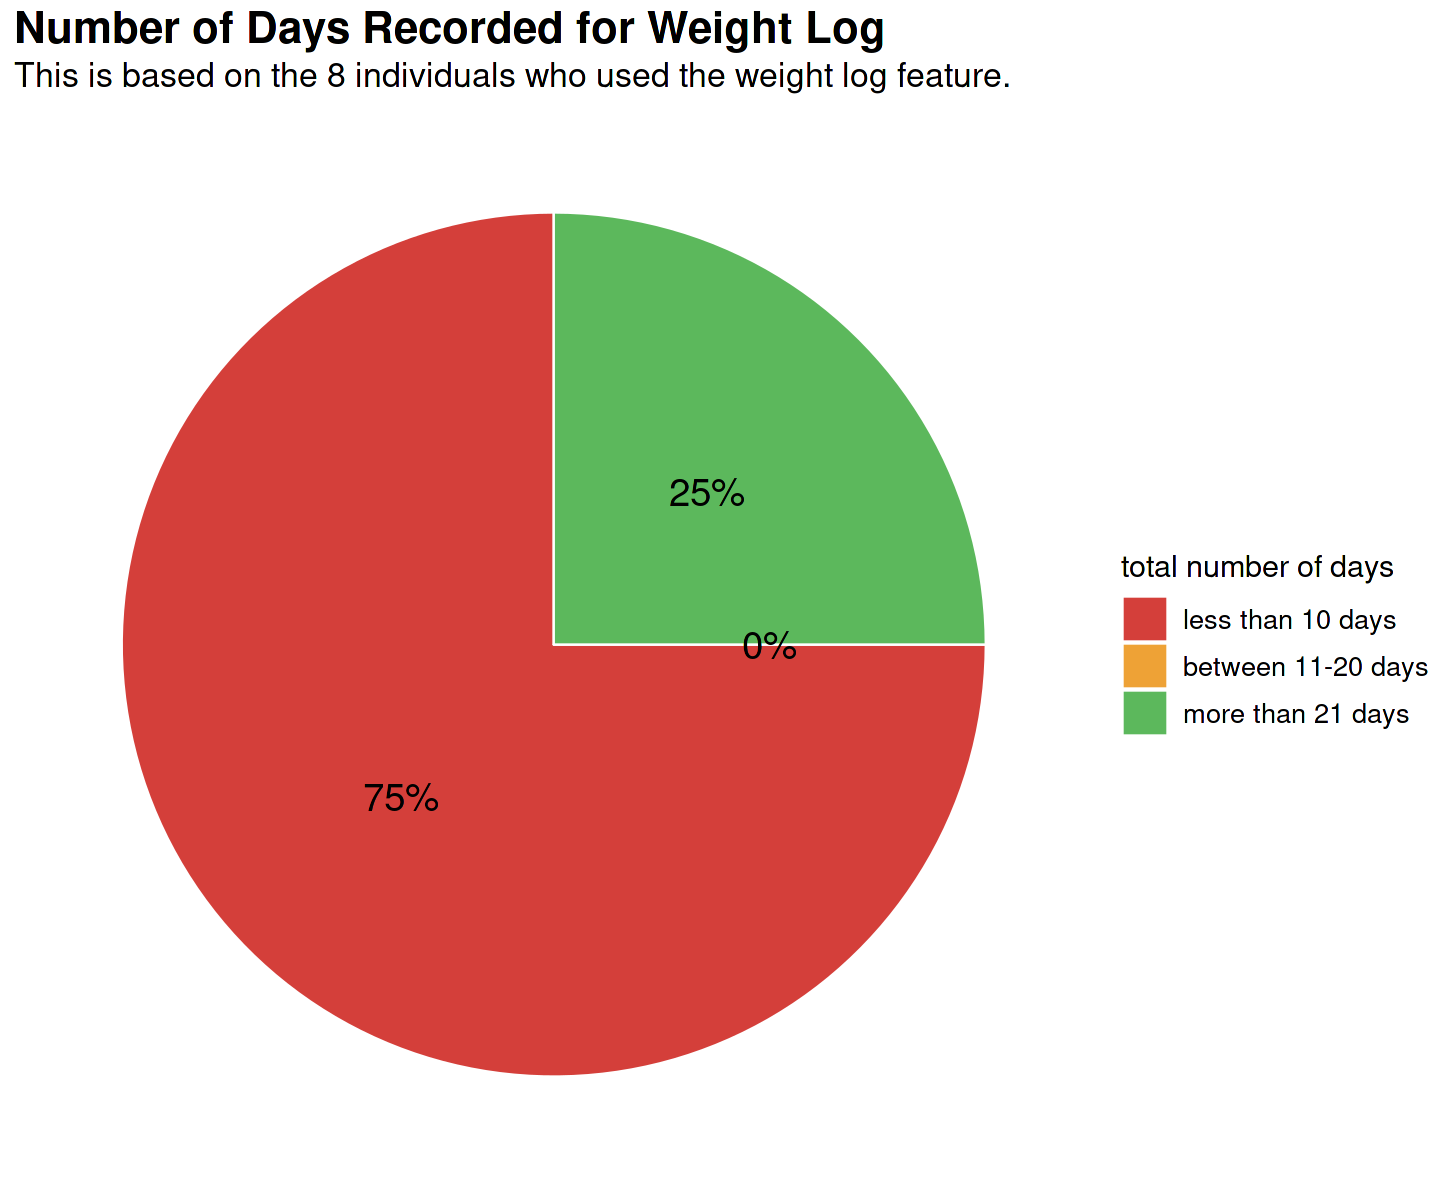

In [78]:
#to avoid r arranges visual and legend in ascending order
weight_day_perc$days_of_usage <- 
factor(weight_day_perc$days_of_usage, levels = c("less than 10 days", "between 11-20 days", "more than 21 days"))
#plotting pie chart
r <- weight_day_perc %>% 
  ggplot() + theme_bw()+
  geom_bar(aes(x=" ", y=perc, fill=days_of_usage),stat="identity", colour="white")+
  coord_polar("y", start =0) +
  labs(title="Number of Days Recorded for Weight Log",
       subtitle="This is based on the 8 individuals who used the weight log feature.") +
  theme(plot.title = element_text(size=26,face="bold"),
        plot.subtitle = element_text(size=20),
        legend.key.size = unit(1, 'cm'),
        legend.key.height = unit(1, 'cm'),
        legend.key.width = unit(1, 'cm'),
        legend.title = element_text(size=18),
        legend.text = element_text(size=16),
        axis.title = element_blank(),
        axis.text = element_blank(), axis.ticks = element_blank(),
        panel.grid = element_blank(), panel.border = element_blank()) +
  scale_fill_locuszoom(name = "total number of days") +
  geom_text(aes(x = " ", y = ypos_r, label=paste0(perc, "%")), size=8)

ypos_r <- cumsum(weight_day_perc$perc) - 0.5*(weight_day_perc$perc)
ypos_r <- 100-ypos_r

print(r)


In [79]:
count(weight_log, c("id", "is_manual_report"))

id,is_manual_report,freq
<dbl>,<chr>,<int>
1503960366,True,2
1927972279,False,1
2873212765,True,2
4319703577,True,2
4558609924,True,5
5577150313,False,1
6962181067,True,30
8877689391,False,24


### **Findings:**
 - **sleep monitoring:**  
   
   - **50%** of the participants recorded **more than 21 days of usage**
   - more people recorded usage of less than 10 days usage as compared to moderate usage (11-20 days)
 
 - **heart rate monitoring:**  
   - **more than 60%** of the participants recored **more than 21 days of usage**
   - individuals who used less than 10 days were **not more than 10%**  
     
 - **weight log:**  
   
   - least popular among the group and out of the 8 individuals who used it, only 2 consistently using it more than 21 days
   - people are not using the weight log feature is due to the need of manually inputting it - only 3 individuals who reported to have done it automatically.

## How active were they? Is there any trend?
Here, we will be looking into the group's active level (intensities of activity). There are 4 different types of active level presented, namely:

1. very active
2. moderately active
3. lightly active
4. sedentary minutes

We are comparing each **active minutes** recorded throughout a week, to identify which day(s) in particular people tends to be more active.

In [80]:
#subsetting active minutes duration recorded from daily_activity
intensities_duration <- daily_activity %>% 
  mutate(day= wday(`date`, label=TRUE, abbr=TRUE)) %>% 
  select(c(1,2,16,11,12,13)) %>% 
  dplyr::group_by(day) %>% 
  dplyr::summarise(total_very_active = round(sum(very_active_minutes/60),0),
            total_moderately_active = round(sum(moderately_active_minutes/60),0),
            total_lightly_active = round(sum(lightly_active_minutes/60),0))
#inspect intensities duration
head(intensities_duration)

day,total_very_active,total_moderately_active,total_lightly_active
<ord>,<dbl>,<dbl>,<dbl>
Sun,40,29,351
Mon,46,28,384
Tue,58,36,500
Wed,52,33,475
Thu,48,29,454
Fri,42,25,429


In [81]:
#transform data from wide to long to produce bar chart
intensities_duration_long <- gather(intensities_duration, type_of_activity,
                                    hours, total_very_active:total_lightly_active,
                                    factor_key = TRUE)

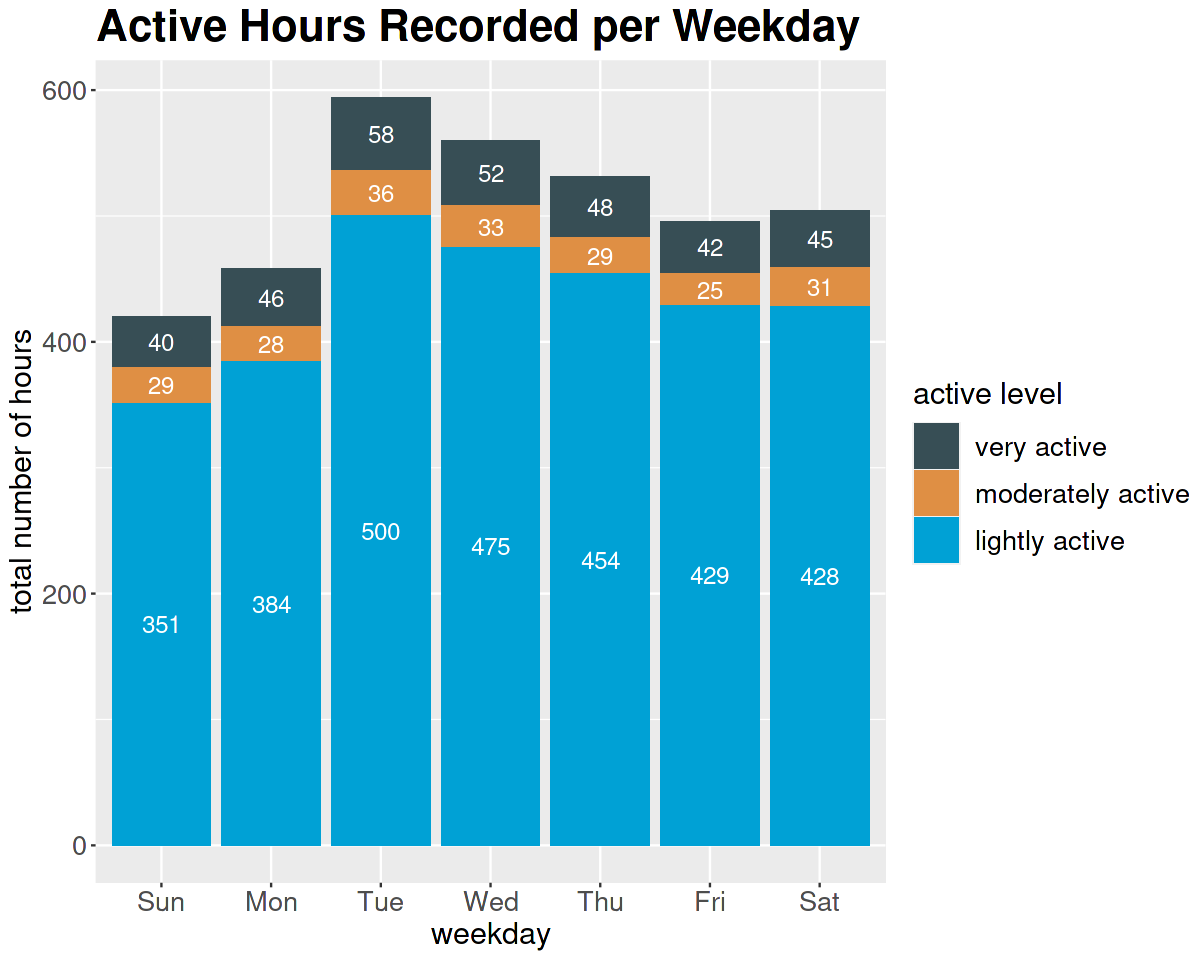

In [82]:
#plotting stacked bar chart
options(repr.plot.width = 10, repr.plot.height = 8)
ggplot(intensities_duration_long, 
       mapping=aes(fill=type_of_activity, x=day, y=hours)) + 
  geom_bar(stat="identity") +
  geom_text(aes(label=hours), position = position_stack(vjust= 0.5),
            colour = "white", size = 5) +
  scale_fill_jama(name = "active level",
                  labels = c("very active",
                             "moderately active",
                             "lightly active")) +
  labs(title="Active Hours Recorded per Weekday",
       x="weekday", y="total number of hours") +
  theme(plot.title = element_text(size=26,face="bold"),
        legend.key.size = unit(1, 'cm'),
        legend.key.height = unit(1, 'cm'),
        legend.key.width = unit(1, 'cm'),
        legend.title = element_text(size=18),
        legend.text = element_text(size=16),
        axis.title=element_text(size=18),
        axis.text=element_text(size=16))

Looking into the **active distance** recorded in comparison:

In [83]:
intensities_distance <- daily_activity %>% 
  mutate(day= wday(`date`, label=TRUE, abbr=TRUE)) %>% 
  select(c(1,2,16,7,8,9)) %>% 
  dplyr::group_by(day) %>% 
  dplyr::summarise(total_very_active = round(sum(very_active_distance),0),
            total_moderately_active = round(sum(moderately_active_distance),0),
            total_lightly_active = round(sum(light_active_distance),0))
#inspect intensities distance
head(intensities_duration)

day,total_very_active,total_moderately_active,total_lightly_active
<ord>,<dbl>,<dbl>,<dbl>
Sun,40,29,351
Mon,46,28,384
Tue,58,36,500
Wed,52,33,475
Thu,48,29,454
Fri,42,25,429


In [84]:
#transform data from wide to long to produce bar chart
intensities_distance_long <- gather(intensities_distance, type_of_activity,
                                    distance, total_very_active:total_lightly_active, factor_key = TRUE)

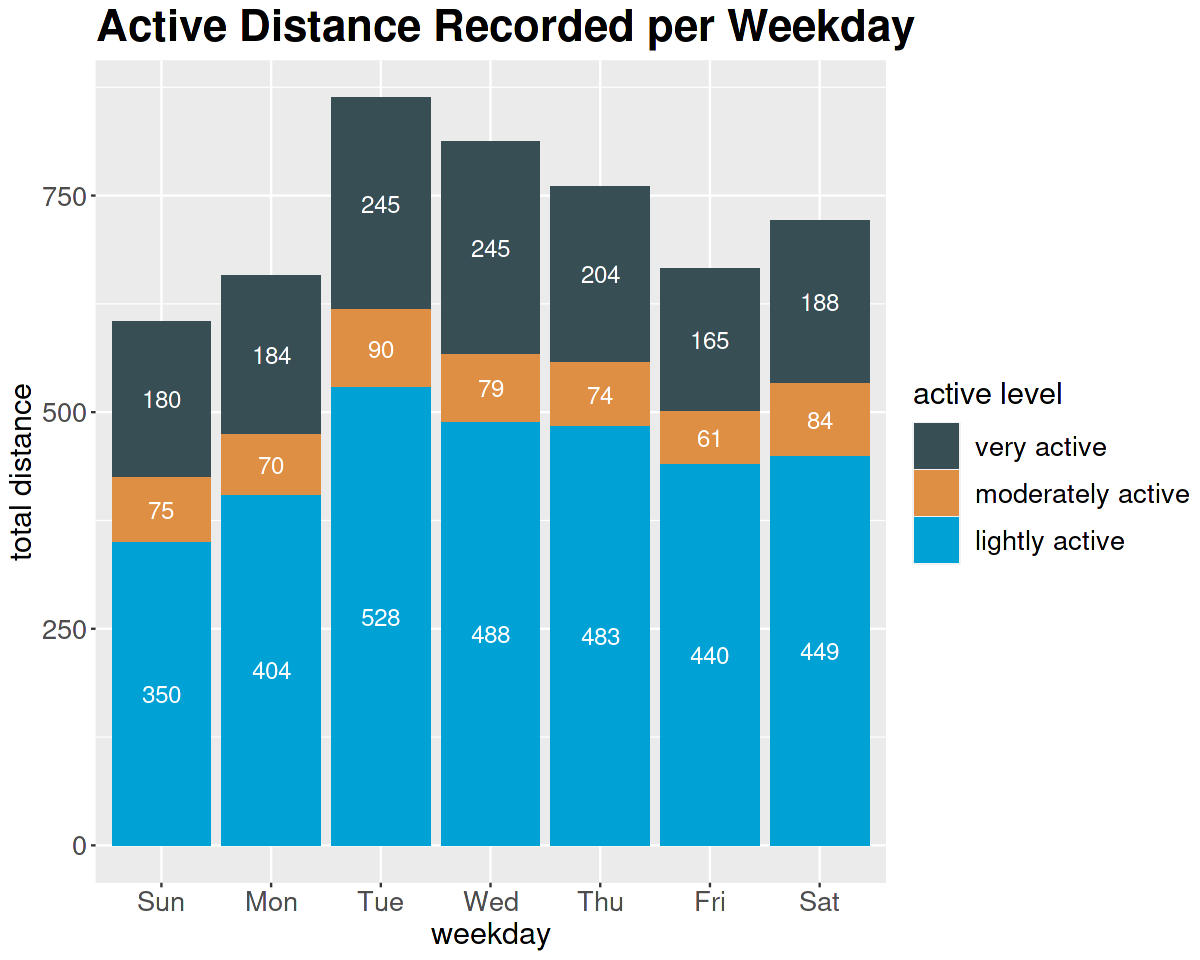

In [85]:
#plotting stacked bar chart
options(repr.plot.width = 10, repr.plot.height = 8)
ggplot(intensities_distance_long, 
       mapping=aes(fill=type_of_activity, x=day, y=distance)) + 
  geom_bar(stat="identity") +
  geom_text(aes(label=distance),position = position_stack(vjust= 0.5),
            colour = "white",size = 5) +
  scale_fill_jama(name = "active level",
                  labels = c("very active",
                             "moderately active",
                             "lightly active")) +
  labs(title="Active Distance Recorded per Weekday",
       x="weekday", y="total distance") +
  theme(plot.title = element_text(size=26,face="bold"),
        legend.key.size = unit(1, 'cm'),
        legend.key.height = unit(1, 'cm'),
        legend.key.width = unit(1, 'cm'),
        legend.title = element_text(size=18),
        legend.text = element_text(size=16),
        axis.title=element_text(size=18),
        axis.text=element_text(size=16))

### **Findings:**
 - **Tuesday** has both the **highest** active minutes and active distance recorded, followed by **Wednesday**
 - **Sunday** has the **least** active minutes and active distance as it is generally a rest day for everyone
 - amount of active minutes and active distances recorded: lightly active > very active > moderately active

## How are these active minutes captured? What are they based on?
According to [Fitbit's official website](https://help.fitbit.com/articles/en_US/Help_article/1379.htm) active minutes are measured with metabolic equivalents (METs).
It factors in body mass, is used to estimate exercise intensity. METs are calculated through a ratio of working metabolic rate relative to resting metabolic rate. Hence it is used to indicate the intensity of an exercise or activity. When at rest, the energy expended is considered 1 MET, hence activity that recorded 5 METs, simply means the particular activity exerted 5 times of energy as compared to at rest.

Here, we are to find out if there's any trend findings from our METs data:
- for this we will look into how the METs value recorded differ in a day
- calculate the mean METs value hourly for each individual, within this 31 days
- assuming that their living/ activity patterns should not be fluctuating much

In [86]:
#hourly average MET value of each individual throughout the 31 days
mets_12mn_mean <- mets_mins %>%
  filter(hour(date_time)==0) %>% 
  dplyr::group_by(id, hour(date_time)) %>% 
  dplyr::summarise(mets_value = mean(mets_value)) %>%
    rowid_to_column("ID") #for easy identification

colnames(mets_12mn_mean) <- c("ID","id","hour","mets_value")

mets_1h_mean <- mets_mins %>%
  filter(hour(date_time)==1) %>% 
  dplyr::group_by(id, hour(date_time)) %>% 
  dplyr::summarise(mets_value = mean(mets_value)) %>%
    rowid_to_column("ID") #for easy identification

colnames(mets_1h_mean) <- c("ID","id","hour","mets_value")

mets_2h_mean <- mets_mins %>%
  filter(hour(date_time)==2) %>% 
  dplyr::group_by(id, hour(date_time)) %>% 
  dplyr::summarise(mets_value = mean(mets_value)) %>%
    rowid_to_column("ID") #for easy identification

colnames(mets_2h_mean) <- c("ID","id","hour","mets_value")

mets_3h_mean <- mets_mins %>%
  filter(hour(date_time)==3) %>% 
  dplyr::group_by(id, hour(date_time)) %>% 
  dplyr::summarise(mets_value = mean(mets_value)) %>%
    rowid_to_column("ID") #for easy identification

colnames(mets_3h_mean) <- c("ID","id","hour","mets_value")

mets_4h_mean <- mets_mins %>%
  filter(hour(date_time)==4) %>% 
  dplyr::group_by(id, hour(date_time)) %>% 
  dplyr::summarise(mets_value = mean(mets_value)) %>%
    rowid_to_column("ID") #for easy identification

colnames(mets_4h_mean) <- c("ID","id","hour","mets_value")

mets_5h_mean <- mets_mins %>%
  filter(hour(date_time)==5) %>% 
  dplyr::group_by(id, hour(date_time)) %>% 
  dplyr::summarise(mets_value = mean(mets_value)) %>%
    rowid_to_column("ID") #for easy identification

colnames(mets_5h_mean) <- c("ID","id","hour","mets_value")

mets_6h_mean <- mets_mins %>%
  filter(hour(date_time)==6) %>% 
  dplyr::group_by(id, hour(date_time)) %>% 
  dplyr::summarise(mets_value = mean(mets_value)) %>%
    rowid_to_column("ID") #for easy identification

colnames(mets_6h_mean) <- c("ID","id","hour","mets_value")

mets_7h_mean <- mets_mins %>%
  filter(hour(date_time)==7) %>% 
  dplyr::group_by(id, hour(date_time)) %>% 
  dplyr::summarise(mets_value = mean(mets_value)) %>%
    rowid_to_column("ID") #for easy identification

colnames(mets_7h_mean) <- c("ID","id","hour","mets_value")

mets_8h_mean <- mets_mins %>%
  filter(hour(date_time)==8) %>% 
  dplyr::group_by(id, hour(date_time)) %>% 
  dplyr::summarise(mets_value = mean(mets_value)) %>%
    rowid_to_column("ID") #for easy identification

colnames(mets_8h_mean) <- c("ID","id","hour","mets_value")

mets_9h_mean <- mets_mins %>%
  filter(hour(date_time)==9) %>% 
  dplyr::group_by(id, hour(date_time)) %>% 
  dplyr::summarise(mets_value = mean(mets_value)) %>%
    rowid_to_column("ID") #for easy identification

colnames(mets_9h_mean) <- c("ID","id","hour","mets_value")

mets_10h_mean <- mets_mins %>%
  filter(hour(date_time)==10) %>% 
  dplyr::group_by(id, hour(date_time)) %>% 
  dplyr::summarise(mets_value = mean(mets_value)) %>%
    rowid_to_column("ID") #for easy identification

colnames(mets_10h_mean) <- c("ID","id","hour","mets_value")

mets_11h_mean <- mets_mins %>%
  filter(hour(date_time)==11) %>% 
  dplyr::group_by(id, hour(date_time)) %>% 
  dplyr::summarise(mets_value = mean(mets_value)) %>%
    rowid_to_column("ID") #for easy identification

colnames(mets_11h_mean) <- c("ID","id","hour","mets_value")

mets_12h_mean <- mets_mins %>%
  filter(hour(date_time)==12) %>% 
  dplyr::group_by(id, hour(date_time)) %>% 
  dplyr::summarise(mets_value = mean(mets_value)) %>%
    rowid_to_column("ID") #for easy identification

colnames(mets_12h_mean) <- c("ID","id","hour","mets_value")

mets_13h_mean <- mets_mins %>%
  filter(hour(date_time)==13) %>% 
  dplyr::group_by(id, hour(date_time)) %>% 
  dplyr::summarise(mets_value = mean(mets_value)) %>%
    rowid_to_column("ID") #for easy identification

colnames(mets_13h_mean) <- c("ID","id","hour","mets_value")

mets_14h_mean <- mets_mins %>%
  filter(hour(date_time)==14) %>% 
  dplyr::group_by(id, hour(date_time)) %>% 
  dplyr::summarise(mets_value = mean(mets_value)) %>%
    rowid_to_column("ID") #for easy identification

colnames(mets_14h_mean) <- c("ID","id","hour","mets_value")

mets_15h_mean <- mets_mins %>%
  filter(hour(date_time)==15) %>% 
  dplyr::group_by(id, hour(date_time)) %>% 
  dplyr::summarise(mets_value = mean(mets_value)) %>%
    rowid_to_column("ID") #for easy identification

colnames(mets_15h_mean) <- c("ID","id","hour","mets_value")

mets_16h_mean <- mets_mins %>%
  filter(hour(date_time)==16) %>% 
  dplyr::group_by(id, hour(date_time)) %>% 
  dplyr::summarise(mets_value = mean(mets_value)) %>%
    rowid_to_column("ID") #for easy identification

colnames(mets_16h_mean) <- c("ID","id","hour","mets_value")

mets_17h_mean <- mets_mins %>%
  filter(hour(date_time)==17) %>% 
  dplyr::group_by(id, hour(date_time)) %>% 
  dplyr::summarise(mets_value = mean(mets_value)) %>%
    rowid_to_column("ID") #for easy identification

colnames(mets_17h_mean) <- c("ID","id","hour","mets_value")

mets_18h_mean <- mets_mins %>%
  filter(hour(date_time)==18) %>% 
  dplyr::group_by(id, hour(date_time)) %>% 
  dplyr::summarise(mets_value = mean(mets_value)) %>%
    rowid_to_column("ID") #for easy identification

colnames(mets_18h_mean) <- c("ID","id","hour","mets_value")

mets_19h_mean <- mets_mins %>%
  filter(hour(date_time)==19) %>% 
  dplyr::group_by(id, hour(date_time)) %>% 
  dplyr::summarise(mets_value = mean(mets_value)) %>%
    rowid_to_column("ID") #for easy identification

colnames(mets_19h_mean) <- c("ID","id","hour","mets_value")

mets_20h_mean <- mets_mins %>%
  filter(hour(date_time)==20) %>% 
  dplyr::group_by(id, hour(date_time)) %>% 
  dplyr::summarise(mets_value = mean(mets_value)) %>%
    rowid_to_column("ID") #for easy identification

colnames(mets_20h_mean) <- c("ID","id","hour","mets_value")

mets_21h_mean <- mets_mins %>%
  filter(hour(date_time)==21) %>% 
  dplyr::group_by(id, hour(date_time)) %>% 
  dplyr::summarise(mets_value = mean(mets_value)) %>%
    rowid_to_column("ID") #for easy identification

colnames(mets_21h_mean) <- c("ID","id","hour","mets_value")

mets_22h_mean <- mets_mins %>%
  filter(hour(date_time)==22) %>% 
  dplyr::group_by(id, hour(date_time)) %>% 
  dplyr::summarise(mets_value = mean(mets_value)) %>%
    rowid_to_column("ID") #for easy identification

colnames(mets_22h_mean) <- c("ID","id","hour","mets_value")

mets_23h_mean <- mets_mins %>%
  filter(hour(date_time)==23) %>% 
  dplyr::group_by(id, hour(date_time)) %>% 
  dplyr::summarise(mets_value = mean(mets_value)) %>%
    rowid_to_column("ID") #for easy identification

colnames(mets_23h_mean) <- c("ID","id","hour","mets_value")

`summarise()` has grouped output by 'id'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'id'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'id'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'id'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'id'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'id'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'id'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'id'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'id'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'id'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'id'. You can override using the `.groups` argument.

`summarise

In [87]:
#merging all data into long data format
mets_mean_long <-
  rbind(mets_12mn_mean, mets_1h_mean,mets_2h_mean,
        mets_3h_mean, mets_4h_mean, mets_5h_mean,
        mets_6h_mean, mets_7h_mean, mets_8h_mean,
        mets_9h_mean, mets_10h_mean, mets_11h_mean,
        mets_12h_mean, mets_13h_mean, mets_14h_mean,
        mets_15h_mean, mets_16h_mean, mets_17h_mean,
        mets_18h_mean, mets_19h_mean, mets_20h_mean,
        mets_21h_mean, mets_22h_mean, mets_23h_mean)

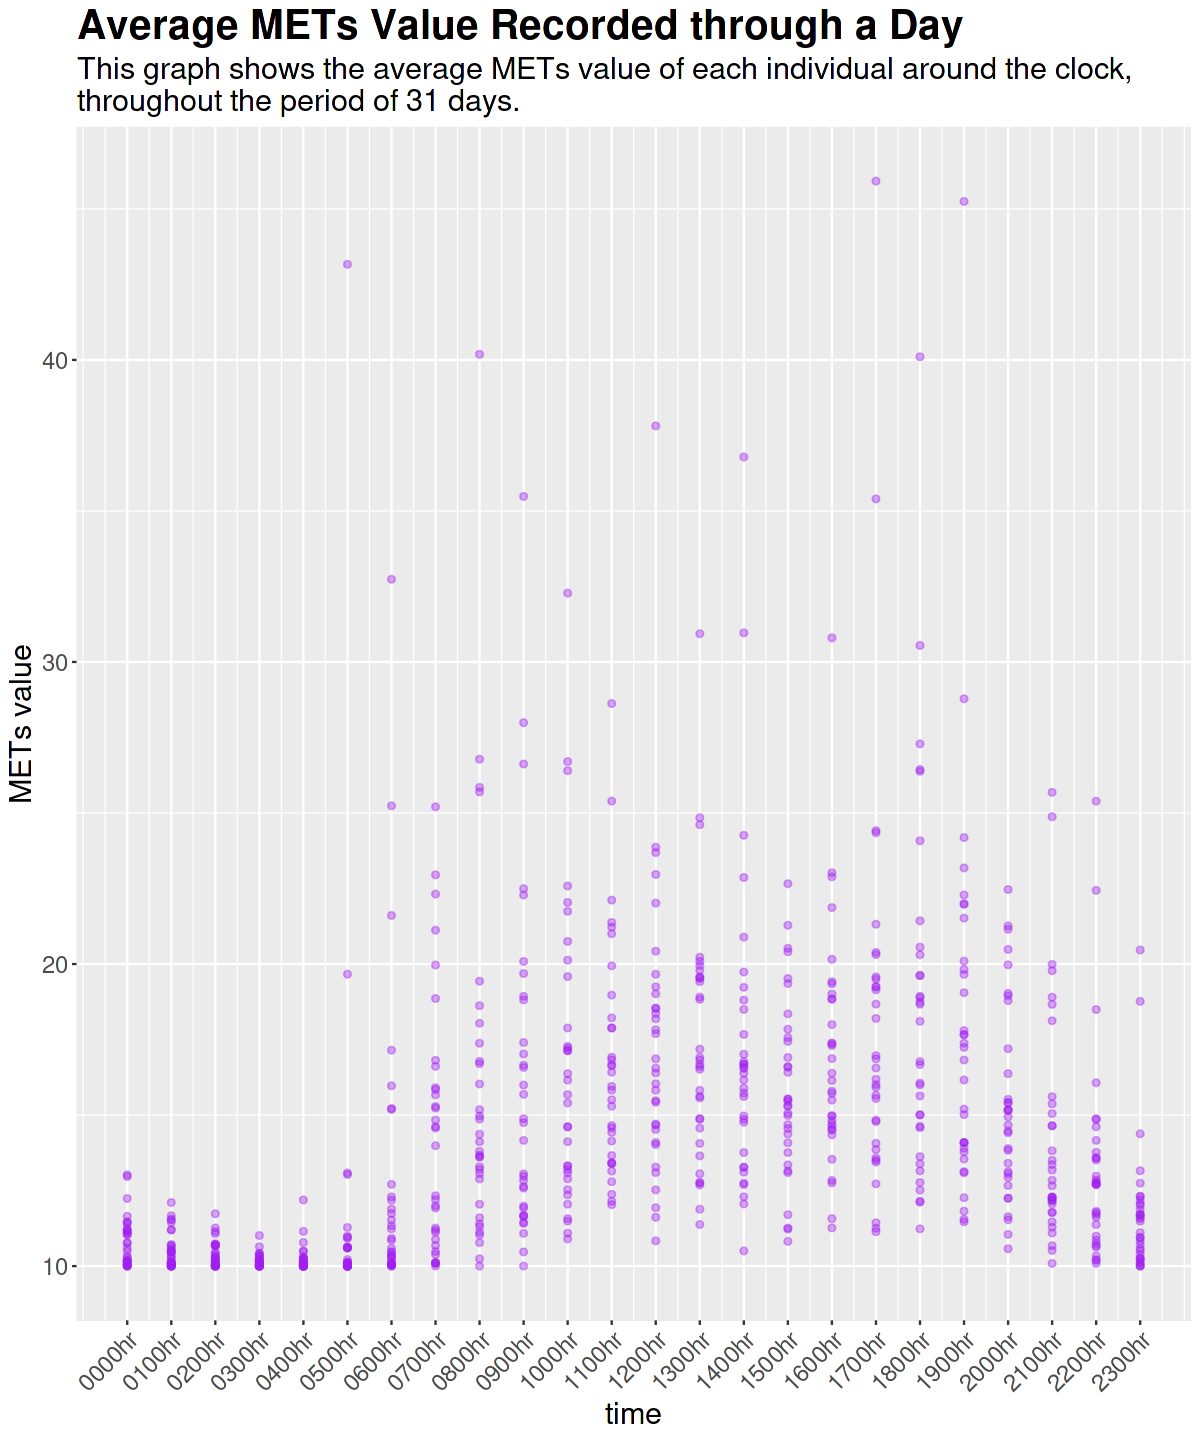

In [88]:
#plotting scatter plot
options(repr.plot.width = 10, repr.plot.height = 12)
ggplot(mets_mean_long) + geom_point(mapping=aes(x=hour, y=mets_value), 
                                    colour="purple", alpha=0.4) +
  labs(title="Average METs Value Recorded through a Day",
       x="time", y="METs value",
       subtitle="This graph shows the average METs value of each individual around the clock,
throughout the period of 31 days.") +
  scale_x_continuous(name="time", breaks=c(0:23), 
                     labels =c("0000hr","0100hr","0200hr","0300hr",
                               "0400hr","0500hr","0600hr","0700hr",
                               "0800hr","0900hr","1000hr","1100hr",
                               "1200hr","1300hr","1400hr","1500hr",
                               "1600hr","1700hr","1800hr","1900hr",
                               "2000hr","2100hr","2200hr","2300hr")) +
  theme_gray()+
  theme(plot.title = element_text(size=24,face="bold"),
        plot.subtitle=element_text(size=18),
        axis.text.x = element_text(angle = 45, hjust=1),
        axis.title=element_text(size=18),
        axis.text=element_text(size=14))

### **Findings**:
- METs value starting to peak from around **1630-1800hr** in the early evening
- METs value shows gradual increase from around **0800-1200hr**

## What about sleep patterns?
We will start off by looking into their sleep efficiency, derived from the total asleep hours out of their total time in bed recorded.

In [89]:
head(daily_sleep)

,id,date,total_sleep_records,total_minutes_asleep,total_time_in_bed
,<dbl>,<date>,<int>,<int>,<int>
1,1503960366,2016-04-12,1,327,346
2,1503960366,2016-04-13,2,384,407
3,1503960366,2016-04-15,1,412,442
4,1503960366,2016-04-16,2,340,367
5,1503960366,2016-04-17,1,700,712
6,1503960366,2016-04-19,1,304,320


In [90]:
#change column names for easier manipulating
colnames(daily_sleep) <- c("id","date","sleep_records","asleep_mins","in_bed_mins")

#creating the metric sleep efficiency
sleep_intensities <- daily_sleep %>% 
  mutate(asleep_hours = asleep_mins/60,
            in_bed_hours = in_bed_mins/60,
            sleep_eff = asleep_hours/in_bed_hours)

In [91]:
#inspecting sleep_intensities data
head(sleep_intensities)

,id,date,sleep_records,asleep_mins,in_bed_mins,asleep_hours,in_bed_hours,sleep_eff
,<dbl>,<date>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,1,327,346,5.450000,5.766667,0.9450867
2,1503960366,2016-04-13,2,384,407,6.400000,6.783333,0.9434889
3,1503960366,2016-04-15,1,412,442,6.866667,7.366667,0.9321267
4,1503960366,2016-04-16,2,340,367,5.666667,6.116667,0.9264305
5,1503960366,2016-04-17,1,700,712,11.666667,11.866667,0.9831461
6,1503960366,2016-04-19,1,304,320,5.066667,5.333333,0.9500000


`geom_smooth()` using formula 'y ~ x'



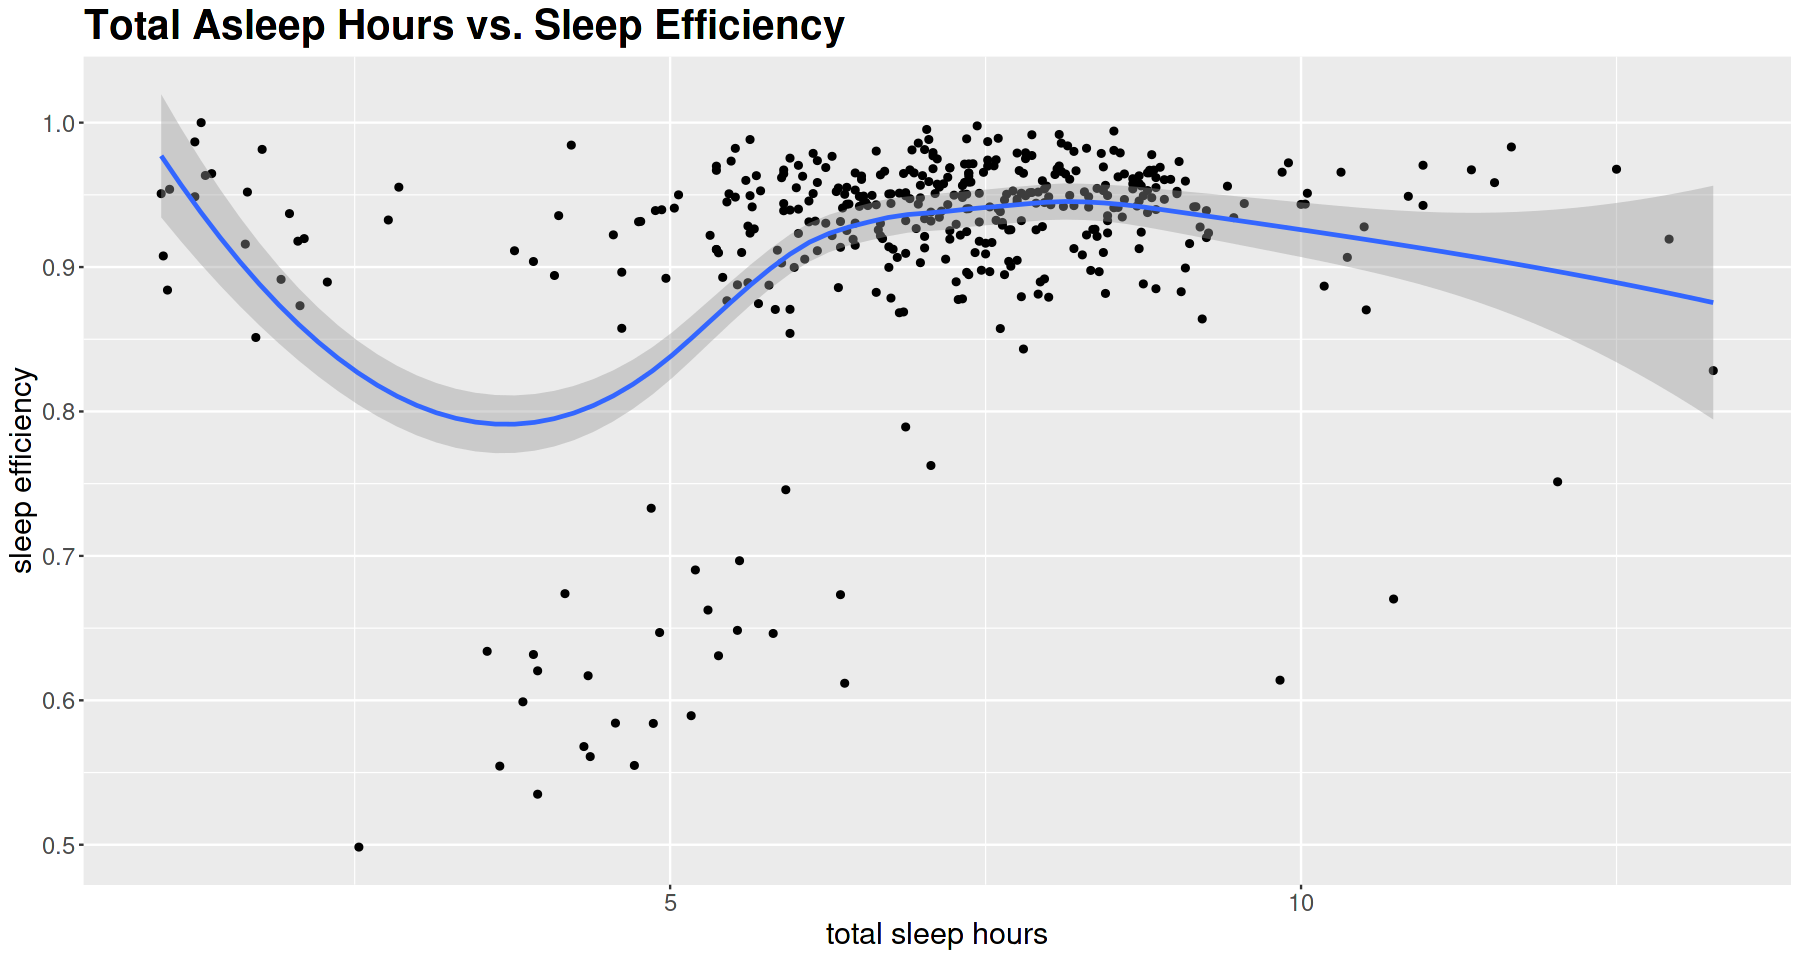

In [92]:
#plotting scatter plot - asleep hours vs. sleep efficiency
options(repr.plot.width = 15, repr.plot.height = 8)
ggplot(sleep_intensities, 
       aes(x=asleep_hours, y=sleep_eff)) +
  geom_point() +
  geom_smooth(method='loess')+
  labs(title="Total Asleep Hours vs. Sleep Efficiency", x="total sleep hours",
       y="sleep efficiency") +
  theme(plot.title = element_text(size=24,face='bold'),
        axis.title=element_text(size=18),
        axis.text=element_text(size=14))

### **Findings:**
- sleep efficiency is lower when the total sleep hours is **lesser than 5 hours**
- individuals who recorded 1-2 asleep hours had high sleep efficiency as well, which could be from individuals who took nap (more data is required)

Moving on, we will find out how the amount of sedentary hours affecting the amount of asleep hours.

In [93]:
#left join to obtain sedentary duration
sleep_intensities_n <- sleep_intensities %>% 
  left_join(daily_activity,
            by=c("id"="id","date"="date")) %>% 
  mutate(sedentary_hours = sedentary_minutes/60) %>%
  select(c(1,2,6,7,8,22))

In [94]:
head(sleep_intensities_n)

,id,date,asleep_hours,in_bed_hours,sleep_eff,sedentary_hours
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,5.450000,5.766667,0.9450867,12.133333
2,1503960366,2016-04-13,6.400000,6.783333,0.9434889,12.933333
3,1503960366,2016-04-15,6.866667,7.366667,0.9321267,12.100000
4,1503960366,2016-04-16,5.666667,6.116667,0.9264305,12.883333
5,1503960366,2016-04-17,11.666667,11.866667,0.9831461,8.983333
6,1503960366,2016-04-19,5.066667,5.333333,0.9500000,12.916667


`geom_smooth()` using formula 'y ~ x'



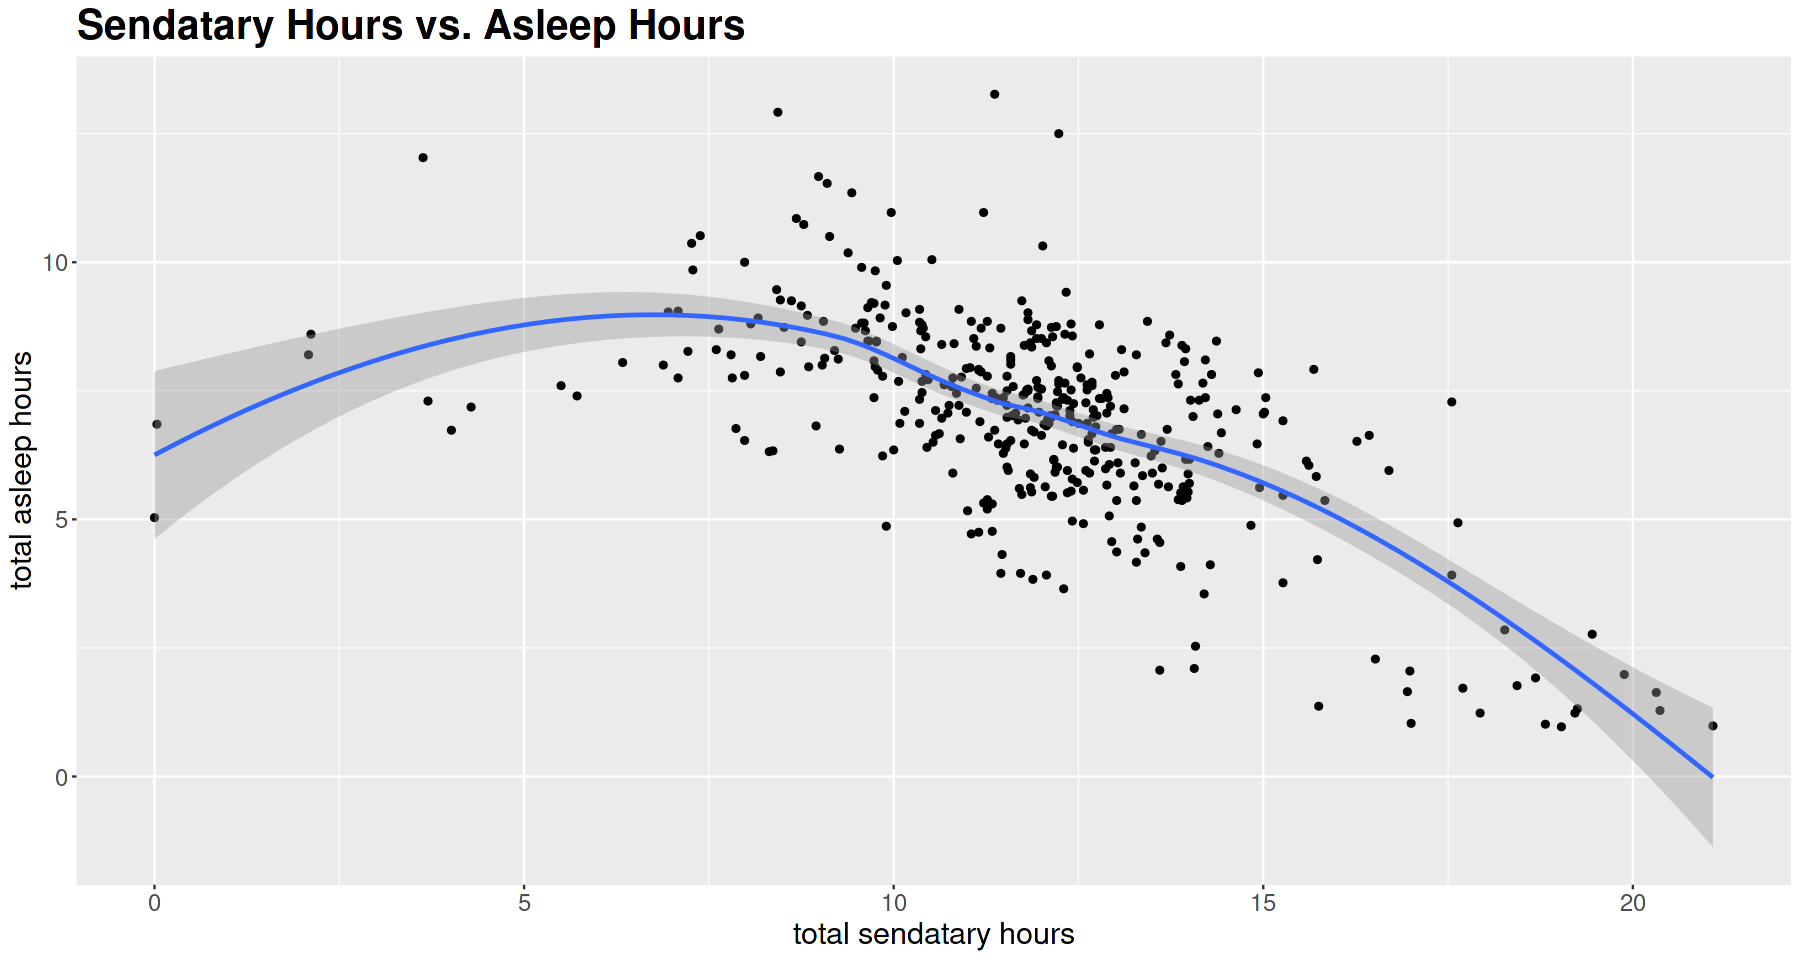

In [95]:
#plotting scatter plot - sedentary hours vs. sleep efficiency
options(repr.plot.width = 15, repr.plot.height = 8)
ggplot(sleep_intensities_n, 
       aes(x=sedentary_hours, y=asleep_hours)) +
  geom_point() +
  geom_smooth(method='loess') + 
  labs(title="Sendatary Hours vs. Asleep Hours", x="total sendatary hours",
       y="total asleep hours") +
  theme(plot.title = element_text(size=24,face='bold'),
        axis.title=element_text(size=18),
        axis.text=element_text(size=14))

### **Findings**:
- individuals who recorded **less than 5 hours of asleep hours** had relatively **longer sedentary hours** recorded
- this indirectly affected their sleep efficiency

# Recommendations:

### General
- different weekly programmes can be created, based on the active level observed from this analysis:  
  
  - medium-to-high active level programmes on Tuesdays, Wednesdays (especially in the early evening)
  - relaxing and mindfulness meditation programmes are suitable on Sundays

- the progress of any improvement can be tracked in the app encouraging user to continue
- a loyalty reward system which provides perks and bonuses for users who manage to use all features consistently or who manage to join weekly programmes

### Sleep Monitoring
- to remind users to be more active, improving their sleep efficiency by reducing the sedentary hours
- to be incorporated into user's stress managing measures
- to be able to identify and include nap time record for accuracy
- to ensure that the smart device ergonomically fits users to put on during their sleep (extra survey needed)

### Heart Rate Monitoring
- to be set as a user default to monitor its relationship with daily active minutes, how it changes with hormonal cycle

### Weight Log
- it is challenging to obtain users weight log as there is no device directly input them into the app
